In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import os
import cv2 as cv2
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import legendre
from scipy.optimize import leastsq
from scipy.interpolate import griddata
import scipy
import h5py
from scipy.spatial import KDTree
import tifffile
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from pathlib import Path
plt.rcParams['figure.facecolor']='w'


In [2]:
from tensorly.decomposition import robust_pca

In [5]:
import sys
for module in sys.modules:
    try:
        print(module,sys.modules[module].__version__)
    except:
        try:
            if  type(modules[module].version) is str:
                print(module,sys.modules[module].version)
            else:
                print(module,sys.modules[module].version())
        except:
            try:
                print(module,sys.modules[module].VERSION)
            except:
                pass

ipykernel 5.3.4
ipykernel._version 5.3.4
json 2.0.9
re 2.2.1
IPython 7.18.1
IPython.core.release 7.18.1
logging 0.5.1.2
zlib 1.0
traitlets 4.3.3
six 1.15.0
ipython_genutils 0.2.0
ipython_genutils._version 0.2.0
platform 1.0.8
traitlets._version 4.3.3
decorator 4.4.2
argparse 1.1
pygments 2.6.1
ctypes 1.1.0
_ctypes 1.1.0
pickleshare 0.7.5
backcall 0.2.0
prompt_toolkit 3.0.7
wcwidth 0.2.5
jedi 0.17.1
parso 0.7.0
urllib.request 3.7
jupyter_client 6.1.6
jupyter_client._version 6.1.6
zmq 19.0.1
zmq.backend.cython 40302
zmq.backend.cython.constants 40302
zmq.sugar 19.0.1
zmq.sugar.constants 40302
zmq.sugar.version 19.0.1
jupyter_core 4.6.3
jupyter_core.version 4.6.3
distutils 3.7.6
colorama 0.4.3
dateutil 2.8.1
decimal 1.70
_decimal 1.70
numpy 1.18.5
numpy.core 1.18.5
numpy.core._multiarray_umath 3.1
numpy.lib 1.18.5
numpy.linalg._umath_linalg b'0.1.5'
pandas 1.1.3
pytz 2020.1
bottleneck 1.3.1
csv 1.0
_csv 1.0
matplotlib 3.2.2
pyparsing 2.4.7
cycler 0.10.0
kiwisolver 1.2.0
PIL 7.2.0
PIL._ver

In [11]:
home=Path.cwd()
img_dir=home/'Poke_Phasics'
try:
    next(img_dir.glob('*.tif'))
except StopIteration:
    print("no images found")

In [19]:
imgs=img_dir.glob('*.tif*')
img0=cv2.imread(next(imgs).as_posix(),-1)[20:-20,20:-20]
nx,ny=img0.shape

#Initialize the Array with First Image
maty=img0.ravel().shape[0]
data_mat=np.zeros((1,maty))

#iterate thru imgs generator of img filepaths
for img in imgs:
    temp=cv2.imread(img.as_posix(),-1)[20:-20,20:-20]
    data_mat=np.vstack((temp.ravel(),data_mat))


(8320,) (1, 8320)
(8320,) (2, 8320)
(8320,) (3, 8320)
(8320,) (4, 8320)
(8320,) (5, 8320)
(8320,) (6, 8320)
(8320,) (7, 8320)
(8320,) (8, 8320)
(8320,) (9, 8320)
(8320,) (10, 8320)
(8320,) (11, 8320)
(8320,) (12, 8320)
(8320,) (13, 8320)
(8320,) (14, 8320)
(8320,) (15, 8320)
(8320,) (16, 8320)
(8320,) (17, 8320)
(8320,) (18, 8320)
(8320,) (19, 8320)
(8320,) (20, 8320)
(8320,) (21, 8320)
(8320,) (22, 8320)
(8320,) (23, 8320)
(8320,) (24, 8320)
(8320,) (25, 8320)
(8320,) (26, 8320)
(8320,) (27, 8320)
(8320,) (28, 8320)
(8320,) (29, 8320)
(8320,) (30, 8320)
(8320,) (31, 8320)
(8320,) (32, 8320)
(8320,) (33, 8320)
(8320,) (34, 8320)
(8320,) (35, 8320)
(8320,) (36, 8320)
(8320,) (37, 8320)
(8320,) (38, 8320)
(8320,) (39, 8320)
(8320,) (40, 8320)
(8320,) (41, 8320)
(8320,) (42, 8320)
(8320,) (43, 8320)
(8320,) (44, 8320)
(8320,) (45, 8320)
(8320,) (46, 8320)
(8320,) (47, 8320)
(8320,) (48, 8320)
(8320,) (49, 8320)


In [20]:
pca=PCA(n_components=50)
u,s,v=pca._fit(data_mat.T)


In [21]:
from sklearn.datasets import load_digits
from sklearn.decomposition import FastICA

A=data_mat.T

transformerICA = FastICA(n_components=50,random_state=0)
ICA_img = transformerICA.fit_transform(A)



Text(0.5, 0.98, 'Original Images')

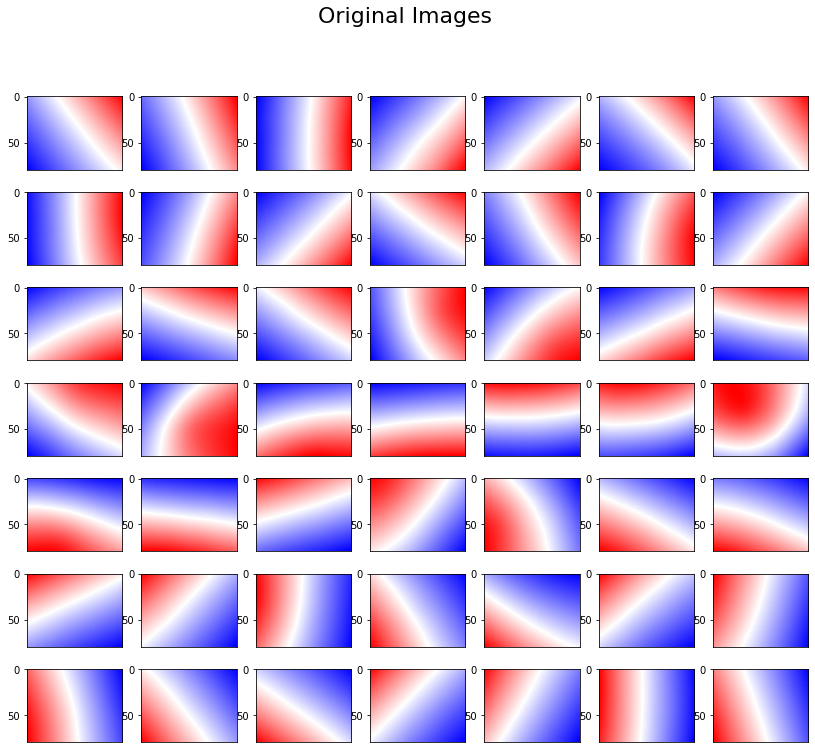

In [26]:
fig,ax=plt.subplots(7,7,figsize=(14,12))
for i in range(0,49):
    row,col=divmod(i,7)
    ax[row][col].imshow(data_mat.T[:,i].reshape(nx,ny),cmap='bwr')
    ax[row][col].axes.get_xaxis().set_ticks([])

plt.suptitle('Original Images',fontsize=(22))


Text(0.5, 0.98, 'ICA Analysis of Poke')

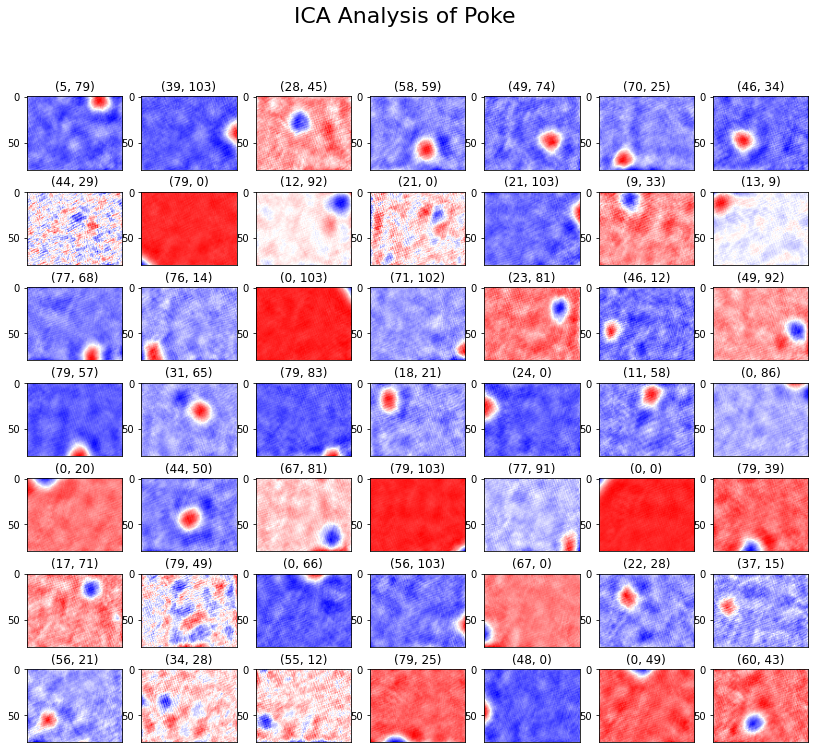

In [27]:
fig,ax=plt.subplots(7,7,figsize=(14,12))
for i in range(0,49):
    row,col=divmod(i,7)
    ax[row][col].imshow(ICA_img[:,i].reshape(nx,ny),cmap='bwr')
    ax[row][col].axes.get_xaxis().set_ticks([])
    
    temp=np.abs(ICA_img[:,i]).reshape(nx,ny)
    ax[row][col].set_title(str(np.unravel_index(temp.argmax(), temp.shape)))
plt.suptitle('ICA Analysis of Poke',fontsize=(22))

Text(0.5, 0.98, 'SVD Analysis of Poke')

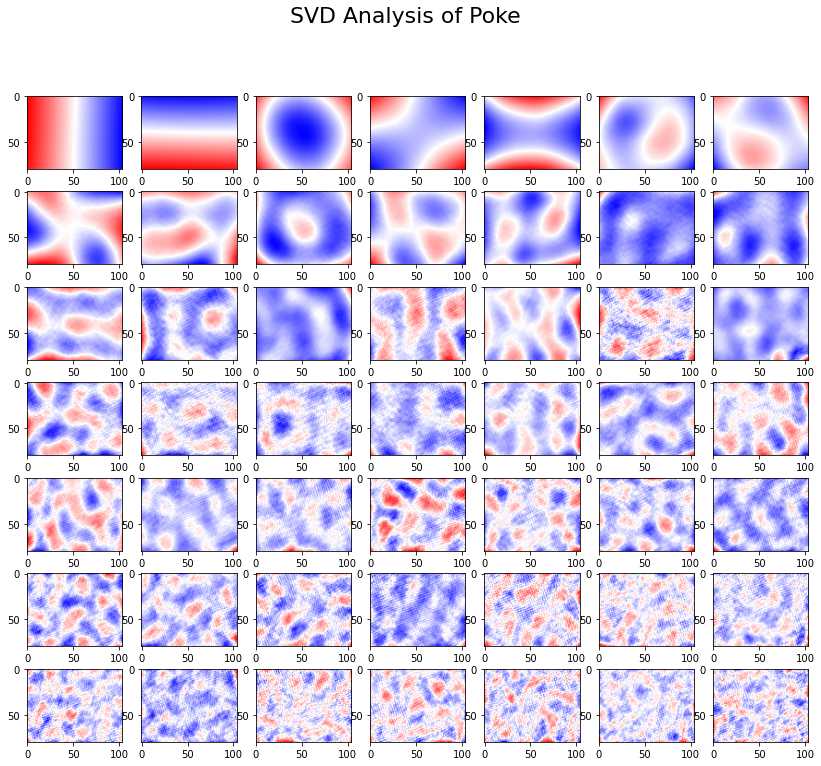

In [28]:
fig,ax=plt.subplots(7,7,figsize=(14,12))
for i in range(0,49):
    row,col=divmod(i,7)
    ax[row][col].imshow(u[:,i].reshape(nx,ny),cmap='bwr')
plt.suptitle('SVD Analysis of Poke',fontsize=(22))

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses

Couldn't import dot_parser, loading of dot files will not be possible.


In [31]:
A=A/(2**16-1)
testA=tf.constant(A[np.newaxis,:,:].swapaxes(1,2),dtype=tf.float32)
#testA.shape

TensorShape([1, 50, 8320])

In [32]:
latent_dim = 50

class Autoencoder(Model):
  def __init__(self, encoding_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Dense(latent_dim,input_shape=(8320,),activation='linear',kernel_regularizer='l2')
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(8320,activation='linear',kernel_regularizer='l2')
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
  
autoencoder = Autoencoder(latent_dim) 

autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [33]:
cb=tf.keras.callbacks.TensorBoard(
    log_dir='logflat', histogram_freq=1, write_graph=True, write_images=False,
    update_freq='epoch')
estop=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=10,min_delta=0.001)

autoencoder.fit(testA,testA,epochs=100,shuffle=True,callbacks=[cb,estop])

Epoch 1/100
1/1 [==============================] - 0s 64ms/step - loss: 2.2465
Epoch 2/100
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1/1 [==============================] - 0s 81ms/step - loss: 2.0505
Epoch 3/100
1/1 [==============================] - 0s 110ms/step - loss: 1.8627
Epoch 4/100
1/1 [==============================] - 0s 94ms/step - loss: 1.6837
Epoch 5/100
1/1 [==============================] - 0s 87ms/step - loss: 1.5203
Epoch 6/100
1/1 [==============================] - 0s 118ms/step - loss: 1.3658
Epoch 7/100
1/1 [==============================] - 0s 61ms/step - loss: 1.2158
Epoch 8/100
1/1 [==============================] - 0s 62ms/step - loss: 1.0687
Epoch 9/100
1/1 [==============================] - 0s 59ms/step - loss: 0.9241
Epoch 10/100
1/1 [==============================] - 0s 60ms/step - loss: 0.7880
Epoch 11/100
1/1 [==============================] - 0s 60ms/step - loss: 0.6742
Epoch 12/100
1/1 [==============================] - 0s 

In [35]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 50)                416050    
_________________________________________________________________
sequential_1 (Sequential)    (None, 50, 8320)          424320    
Total params: 840,370
Trainable params: 840,370
Non-trainable params: 0
_________________________________________________________________


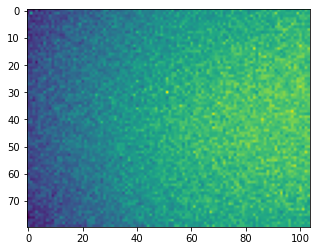

In [39]:
from sklearn.decomposition import PCA
u,s,v=np.linalg.svd(c.T,full_matrices=False)
new_u=np.reshape(u.T,[50,nx,ny])
new_u.shape
plt.imshow(new_u[0,:,:])
#test=PCA(n_components=20).fit(c.T)
#test.components_.shape

In [166]:
low_rank_part.sum()/sparse_part.sum()

6739.903387725102

In [209]:
test=np.zeros_like(data_tensor)
test[:,50:55,50:55]=4
test.sum()

5000.0

In [205]:
data_tensor=data_mat.reshape(50,nx,ny)/(2**16-1)
#data_tensor_noise=0.9*data_tensor+0.1*np.random.rand(50,nx,ny)
data_tensor_noise=data_tensor
data_tensor_noise[:,50:55,50:55]=4
#data_tensor_noise[:,10:80,50:80]=0

In [ ]:
data

In [206]:
low_rank_part, sparse_part = robust_pca(data_tensor_noise, reg_E=0.1, learning_rate=1.2, n_iter_max=200)



Converged in 114 iterations


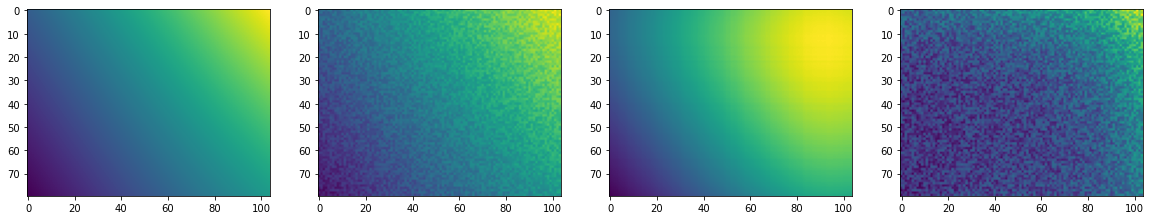

In [186]:
fig,ax=plt.subplots(1,4,figsize=(20,10))
ax[0].imshow(data_tensor[0,:,:])
ax[1].imshow(data_tensor_noise[0,:,:])
ax[2].imshow(low_rank_part[0,:,:])
ax[3].imshow(sparse_part[0,:,:])

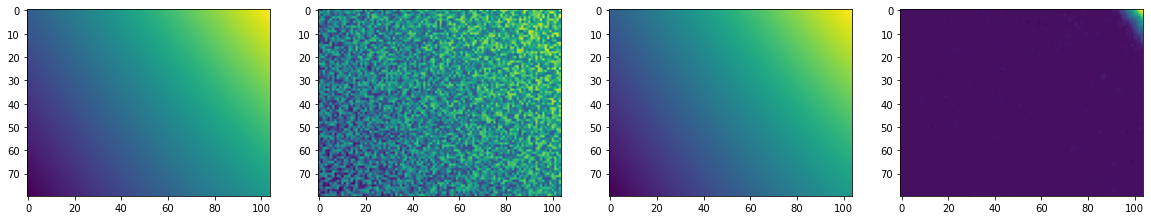

In [174]:
fig,ax=plt.subplots(1,4,figsize=(20,10))
ax[0].imshow(data_tensor[0,:,:])
ax[1].imshow(data_tensor_noise[0,:,:])
ax[2].imshow(low_rank_part[0,:,:])
ax[3].imshow(sparse_part[0,:,:])

In [202]:
low_rank_part, sparse_part = robust_pca(data_tensor, reg_E=0.1, learning_rate=1.2, n_iter_max=200)


Converged in 114 iterations


In [208]:
low_rank_part.sum(),sparse_part.sum()

(195710.1302085414, 90.08358598333203)

Text(0.5, 0.98, 'Sprase of Original')

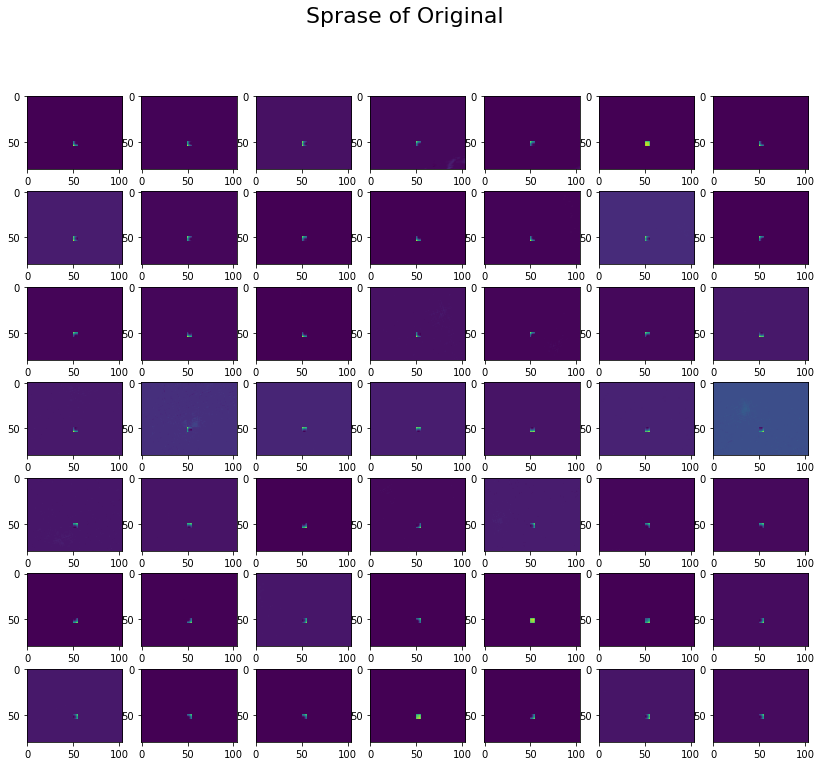

In [207]:
fig,ax=plt.subplots(7,7,figsize=(14,12))
for i in range(0,49):
    row,col=divmod(i,7)
    ax[row][col].imshow(sparse_part[i,:,:],cmap='viridis')
plt.suptitle('Sprase of Original',fontsize=(22))

In [175]:
data_low_rank=low_rank_part.reshape(50,80*104)

In [176]:
u,s,v=scipy.linalg.svd(data_low_rank.T,full_matrices=True)
print(u.shape)

(8320, 8320)


In [177]:
data_low_rank.T.shape

(8320, 50)

Text(0.5, 0.98, 'SVD Analysis of Poke - Low Rank Robust PCA Filtered')

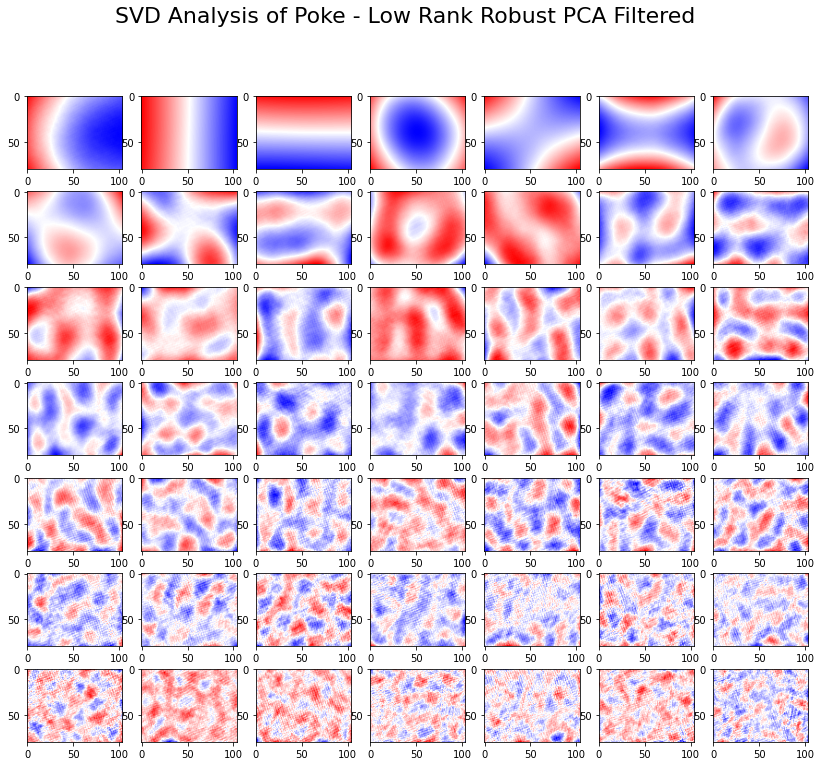

In [178]:
fig,ax=plt.subplots(7,7,figsize=(14,12))
for i in range(0,49):
    row,col=divmod(i,7)
    ax[row][col].imshow(u[:,i].reshape(nx,ny),cmap='bwr')
plt.suptitle('SVD Analysis of Poke - Low Rank Robust PCA Filtered',fontsize=(22))

In [179]:
low_rank_part.sum()/sparse_part.sum()

6739.903387725102

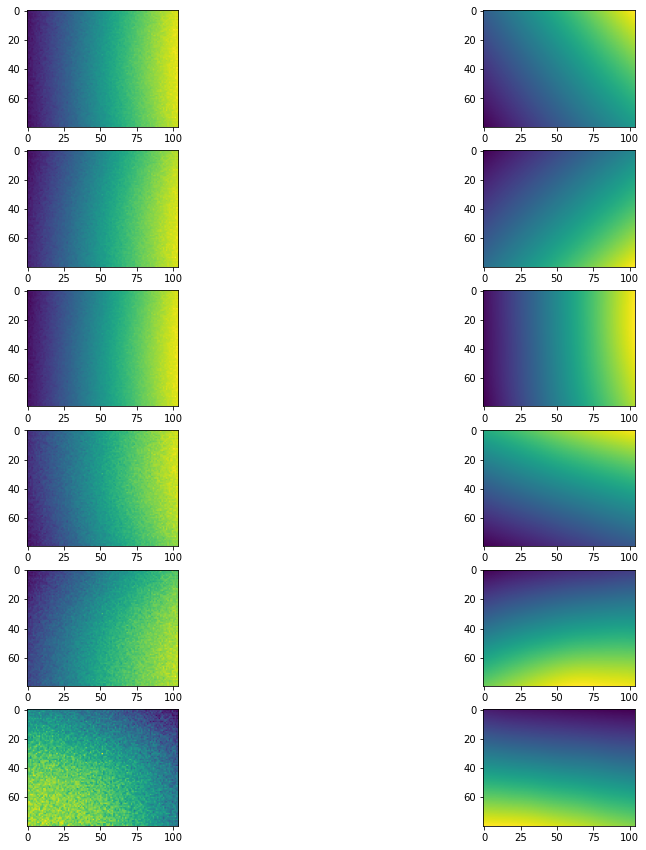

In [40]:
fig,ax=plt.subplots(6,2,figsize=(15,15))
j=23
for row,j in enumerate([0,4,7,15,23,29]):
    ax[row][0].imshow(autoencoder(testA).numpy()[0,j,:].reshape(nx,ny))
    ax[row][1].imshow(testA.numpy()[0,j,:].reshape(nx,ny))

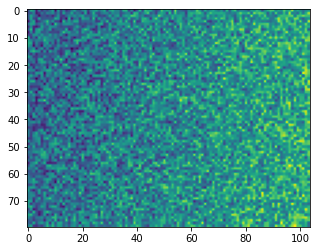

In [180]:
test=np.zeros((1,20))
test[0,4]=1
test
plt.imshow(autoencoder.decoder(test).numpy().reshape(nx,ny))

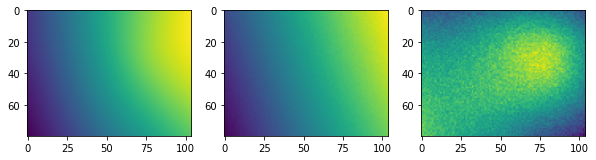

In [18]:
fig,ax=plt.subplots(1,3,figsize=(10,10))
j=32
ax[0].imshow(inputArr[j,:,:])
ax[1].imshow(autoencoder(inputArr[j:j+1,:,:]).numpy()[0,:,:])
ax[2].imshow(inputArr[j,:,:]-autoencoder(inputArr[j:j+1,:,:]).numpy()[0,:,:])

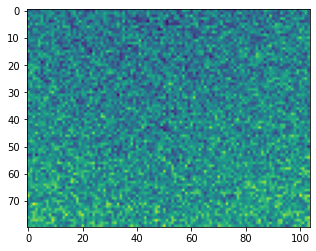

In [33]:
test=np.expand_dims(np.zeros(50),1).T
test[0,3]=1
plt.imshow(autoencoder.decoder(test).numpy()[0,:,:])

In [17]:
inputArr[20,:,:]-autoencoder(inputArr[20:21,:,:]).numpy()

array([[[ 0.00364932,  0.00774114,  0.00953305, ...,  0.03177413,
          0.03110249,  0.03300365],
        [ 0.00356655,  0.00457357,  0.00061117, ...,  0.02600763,
          0.02835805,  0.02857756],
        [ 0.000743  ,  0.00199072,  0.00297295, ...,  0.02850133,
          0.02862275,  0.02380911],
        ...,
        [ 0.02632999,  0.02781814,  0.02462429, ...,  0.00663692,
          0.00251448, -0.0009746 ],
        [ 0.02366728,  0.02737367,  0.02724767, ...,  0.00151491,
         -0.00160193,  0.00261754],
        [ 0.0317561 ,  0.02890742,  0.03439021, ...,  0.00211966,
         -0.0041042 , -0.00041622]]], dtype=float32)

In [ ]:
pca_score=np.zeros(49)
pca_score_std=np.zeros(49)
for n_ in range(1,50):
    
    pca=PCA(n_components=n_)
    u,s,v=pca._fit(data_mat.T)
    #pca_score[n_-1]=pca.score(data_mat.T)
    pca_score[n_-1]=np.mean(cross_val_score(pca,data_mat.T,cv=))
    pca_score_std[n_-1]=np.std(cross_val_score(pca,data_mat.T,cv=3))
plt.errorbar(range(1,50),pca_score,pca_score_std)
    

In [ ]:
allFiles=glob.glob(r'D:\L4\AustinPoke\ColdWF\*.tif')
img0=cv2.imread(allFiles[0],-1)[20:-20,20:-20]
nx,ny=img0.shape
maty=img0.flatten().shape[0]
matx=np.size(allFiles)
test_mat=np.zeros((matx,maty))
k=-1
for file_ in allFiles:
    k+=1
    temp=cv2.imread(file_,-1)[20:-20,20:-20]
    test_mat[k,:]=temp.flatten()


In [ ]:
print(cross_val_score(pca,data_mat.T,cv=5))
print(cross_val_score(pca,data_mat.T,y=test_mat.T,cv=5))

In [ ]:
sns.heatmap(data_mat.T)

In [ ]:
control_mat=scipy.linalg.pinv(data_mat.T)

In [ ]:
control_mat=v.T @ np.diag(1/s) @ u.T
#test-control_mat

In [ ]:
test_wf.shape, control_mat.shape

In [ ]:
test_wf=test_mat[0,:]
act_commands=-1*control_mat@test_wf
pred_wf_delta=data_mat.T@act_commands
resid=test_wf+pred_wf_delta
print (np.std(test_wf),np.std(pred_wf_delta),np.std(resid))


In [ ]:
fig,ax=plt.subplots(3,1,figsize=(5,10))

vmax=test_wf.max()
vmin=test_wf.min()

ax[0].imshow(test_wf.reshape(nx,ny),vmin=vmin,vmax=vmax)
ax[1].imshow(-1*pred_wf_delta.reshape(nx,ny),vmin=vmin,vmax=vmax)
ax[2].imshow(resid.reshape(nx,ny),vmin=vmin,vmax=vmax)



In [76]:
from pathlib import Path
from urllib.request import urlretrieve
import zipfile
from imageio import imread
from scipy.ndimage.interpolation import zoom#
import numpy as np


def fetch_cropped_yaleb(data_folder, zooming=0.5, max_n_subjects=None):
    """Returns a dictionary of paths
    
    Parameters
    ----------
    data_folder: string
    zooming: float, optional, default is 0.5
        factor by which to resize the images
    max_n_subjects: {None, int}, optional, default is None
        if not None, only the first max_n_subjects are returned
    
    Returns
    -------
    dict: {
        subjects_1: {'images': [image_1, ... image_N],
               'ambient': image_ambient,
        }
    }
    
    images are stored as numpy arrays
    """
    url = 'http://vision.ucsd.edu/extyaleb/CroppedYaleBZip/CroppedYale.zip'
    yaleb_path = Path(data_folder).joinpath('cropped_yaleb')
    
    if not yaleb_path.joinpath('CroppedYale').exists():
        yaleb_path.mkdir(parents=True)
    
    # If not already unzip, do it
    if not list(yaleb_path.iterdir()):
        zip_path = yaleb_path.joinpath('yaleb.zip')
        
        # If zip not already downloaded, download it
        if not zip_path.exists():
            urlretrieve(url, zip_path.as_posix())
        
        zfile = zipfile.ZipFile(zip_path.as_posix())
        zfile.extractall(path=yaleb_path.as_posix())

    yaleb = {}
    for folder_path in yaleb_path.joinpath('CroppedYale').iterdir():
        if max_n_subjects is not None and len(yaleb) > max_n_subjects:
            return yaleb
        
        if not folder_path.is_dir():
            continue
            
        video_name = folder_path.name
        paths = sorted(list(folder_path.glob('*.pgm')))
        images = []
        for path in paths:
            if 'Ambient' in path.name:
                ambient = imread(path.as_posix())
            else:
                images.append(zoom(imread(path.as_posix()), zooming)[None, ...])
                
        data = {'images':np.concatenate(images),
        'ambient':ambient}
        yaleb[video_name] = data

    return yaleb

In [79]:
dataset_path = home/'data'/'tensorly_data'

data = fetch_cropped_yaleb(dataset_path, zooming=0.3, max_n_subjects=5)

KeyboardInterrupt: 

In [85]:
yaleb = {}
url = 'http://vision.ucsd.edu/extyaleb/CroppedYaleBZip/CroppedYale.zip'
yaleb_path = Path(dataset_path).joinpath('cropped_yaleb')

zooming=0.3
max_n_subjects=5

for folder_path in yaleb_path.joinpath('CroppedYale').iterdir():
    #if max_n_subjects is not None and len(yaleb) > max_n_subjects:
    #return yaleb

    if not folder_path.is_dir():
        continue

    video_name = folder_path.name
    paths = sorted(list(folder_path.glob('*.pgm')))
    images = []
    for path in paths:
        if 'Ambient' in path.name:
            ambient = imread(path.as_posix())
        else:
            images.append(zoom(imread(path.as_posix()), zooming)[None, ...])

    data = {'images':np.concatenate(images),
    'ambient':ambient}
    yaleb[video_name] = data

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\gavin.friedman.ELI-BEAMS\\GitELI\\SVDProject\\data\\tensorly_data\\cropped_yaleb\\CroppedYale'